In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
PATH = os.path.join('.\\..\\data\\dados_imprestimo.xlsx')
df = pd.read_excel(PATH)

In [8]:
df.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por,Ano,Mes,Dia,Regiao
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,3100104.0,Devolvido,2009-08-19,STN,2009,8,2009-08-19,Sudeste
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,3100104.0,Arquivado,2008-04-17,STN,2008,4,2008-04-17,Sudeste
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,3100104.0,Deferido,2009-11-20,STN,2009,11,2009-11-20,Sudeste
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,3100104.0,Deferido,2009-11-20,STN,2009,11,2009-11-20,Sudeste
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,3100104.0,Deferido,2013-11-06,STN,2013,11,2013-11-06,Sudeste


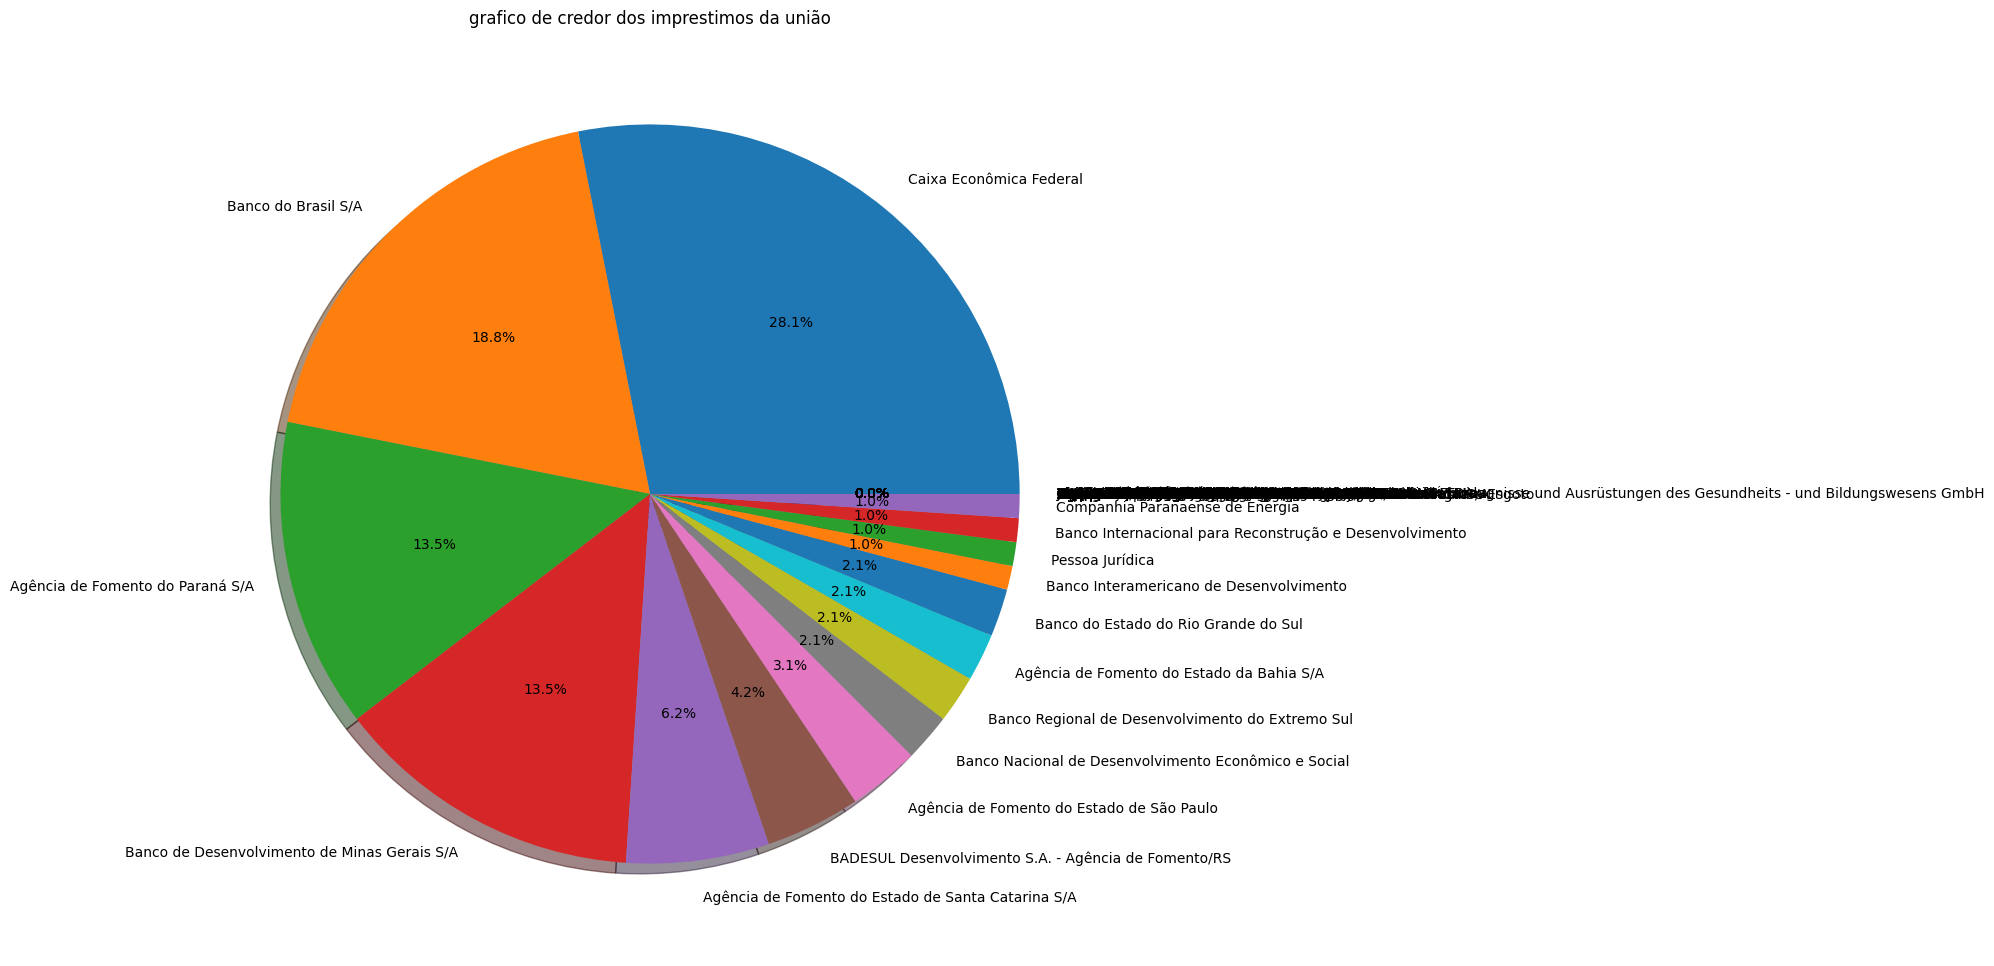

In [3]:
credor = round(df['Credor'].value_counts(normalize=True) * 100)
plt.figure(figsize=(20,12))
plt.title('grafico de credor dos imprestimos da união')
plt.pie(
    credor,
    labels=credor.index,
    autopct='%1.1f%%',
    shadow=True
)
plt.show()

In [16]:
credor

Credor
Caixa Econômica Federal                               27.0
Banco do Brasil S/A                                   18.0
Agência de Fomento do Paraná S/A                      13.0
Banco de Desenvolvimento de Minas Gerais S/A          13.0
Agência de Fomento do Estado de Santa Catarina S/A     6.0
                                                      ... 
Companhia Matonense de Saneamento                      0.0
Petrobras Distribuidora S.A.                           0.0
Banco do Estado do Rio Grande do Norte                 0.0
Tramontina S/A - Cutelaria                             0.0
UniCredit S.p.A.                                       0.0
Name: proportion, Length: 137, dtype: float64

In [4]:
regiao = df['Regiao'].value_counts()
regiao

Regiao
Sul             11537
Sudeste          9013
Nordeste         3016
Centro-Oeste     1431
Norte             894
Name: count, dtype: int64

C:\Users\cicer\AppData\Local\Temp\ipykernel_4284\2082206830.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


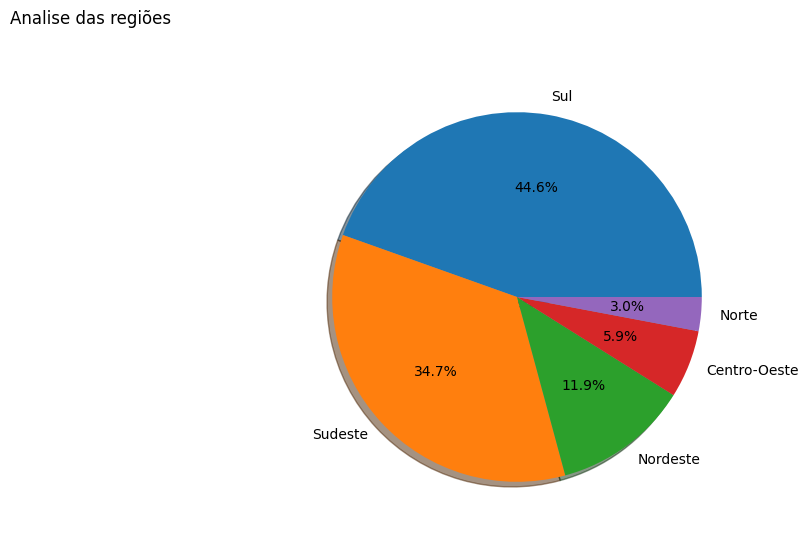

In [3]:
regiao = round(df['Regiao'].value_counts(normalize=True) * 100)

fig,ax = plt.subplots(figsize=(12,6))
fig.text(0.09, 0.95, 'Analise das regiões ', fontsize=12)


ax.pie(
    regiao,
    labels=regiao.index,
    shadow=True,
    autopct='%1.1f%%'
)
fig.show()


In [4]:
df['Valor'].describe()

count    2.589100e+04
mean     4.748587e+07
std      1.696003e+09
min      0.000000e+00
25%      5.038790e+05
50%      1.470441e+06
75%      5.000000e+06
max      2.235400e+11
Name: Valor, dtype: float64

In [6]:
df['Valor'].max

<bound method Series.max of 0         300000.0
1         172700.0
2         300000.0
3         187200.0
4        1000000.0
           ...    
25886     200000.0
25887    1000000.0
25888      47394.0
25889     250000.0
25890     650000.0
Name: Valor, Length: 25891, dtype: float64>

In [5]:
analise_anos = df.groupby(by=['Ano']).agg(Sum=('Valor','sum'))
analise_anos

,Sum
Ano,
2002,3.677339e+09
2003,1.435136e+09
2004,6.574423e+09
2005,2.129050e+09
2006,1.564292e+10
2007,7.354954e+09
2008,1.567885e+10
2009,1.746123e+10
2010,1.231984e+11


In [6]:
analise_finalidade = df.groupby(by=['Finalidade']).agg(Sum = ('Valor','sum'))
analise_finalidade

,Sum
Finalidade,
Aditivo contratual,3.402731e+09
Amortização de dívida,3.954945e+09
Aporte de capital,3.141334e+09
Aporte em PPP,4.554898e+09
"Aquisição de máquinas, equipamentos e veículos",1.497294e+10
...,...
Saneamento para Todos,6.050190e+09
Saúde,1.615774e+09
Segurança pública,9.735478e+08


In [7]:
analise_valor_regiao = df.groupby(by=['Regiao']).agg(Sum = ('Valor','sum'))
analise_valor_regiao

,Sum
Regiao,
Centro-Oeste,7.718405e+10
Nordeste,2.161695e+11
Norte,8.908030e+10
Sudeste,6.488697e+11
Sul,1.981530e+11


In [9]:
analise_credor = df.groupby(by=['Credor']).agg(Sum = ('Valor','sum'))
analise_credor

,Sum
Credor,
AES Sul Distribuidora Gaúcha de Energia S/A,4.930850e+07
Agência Especial de Financiamento Industrial S.A.,2.500000e+09
Agência Francesa de Desenvolvimento,2.010085e+09
Agência de Fomento Econômico de Ponta Grossa,4.283394e+06
Agência de Fomento do Estado da Bahia S/A,1.088593e+09
...,...
Tramontina S/A - Cutelaria,1.700000e+06
UniCredit S.p.A.,3.515390e+07
União,4.371476e+11


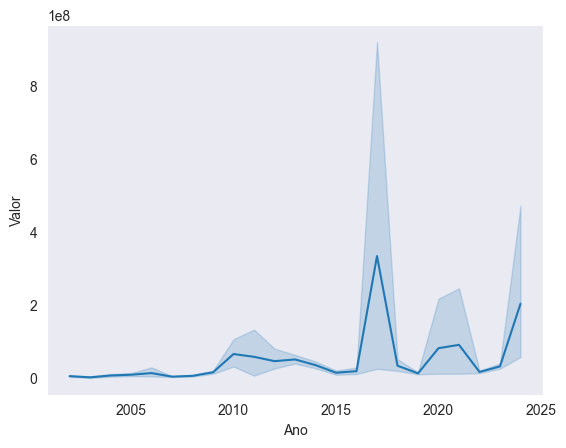